# Histogramas en Python

## Histogramas en Python puro

In [1]:
# Vector de datos
x = (0,1,1,1,2,2,3,7,7,7,25)

In [2]:
def count_elements(seq) -> dict:
    """Funcion que cuenta las frecuencias de aparicion de cada 
    elemento de la secuencia, creando un diccionario como 
    si fuese una tabla de frecuencias"""
    hist = {}
    for i in seq:
        hist[i] = hist.get(i , 0) + 1
    return hist

In [3]:
fAbs = count_elements(x)

In [5]:
# Obtener las frecuencias absolutas con nuestra funcion
fAbs

{0: 1, 1: 3, 2: 2, 3: 1, 7: 3, 25: 1}

In [6]:
from collections import Counter

In [8]:
fAbs2 = Counter(x)

In [9]:
# Obtener las frecuencias absolutas del paquete collections
fAbs2

Counter({0: 1, 1: 3, 2: 2, 3: 1, 7: 3, 25: 1})

In [10]:
fAbs.items() == fAbs2.items()

True

In [11]:
# Crear una funcion que genere un histograma
def ascii_histogram(seq) -> None:
    """
    Un histograma de frecuencias absolutas
    colocado en horizontal y con caracteres ASCII
    """
    fAbs = count_elements(seq)
    for k in sorted(fAbs):
        print('{0:5d} {1}'.format(k, '+'*fAbs[k]))

In [12]:
ascii_histogram(x)

    0 +
    1 +++
    2 ++
    3 +
    7 +++
   25 +


In [13]:
import random
random.seed(2019)

In [24]:
vals = [1,2,3,5,7,8,9,10]
freqs = (random.randint(5,20) for _ in vals)

In [25]:
data = []
for k, v in zip(vals, freqs):
    data.extend([k]*v)

In [28]:
ascii_histogram(data)

    1 ++++++++++++++++
    2 +++++++++++++++
    3 +++++++++++++
    5 +++++++++++
    7 ++++++++++++++++++++
    8 ++++++++
    9 ++++++++
   10 ++++++++++


## Histogramas con NumPy

In [29]:
import numpy as np

In [30]:
np.random.seed(2019)

In [31]:
# Cambiar los ajustes con los que imprime numpy
np.set_printoptions(precision=3)

In [32]:
x = np.random.laplace(loc=19, scale=3, size=1000)

In [36]:
x[:10]

array([23.935, 18.278, 19.855, 19.968, 23.294, 17.459, 20.555, 23.926,
       23.316, 18.373])

In [37]:
hist, bin_edges = np.histogram(x)

In [40]:
# Observaciones entre cada intervalo
hist

array([  1,   0,   0,   8,  48, 194, 542, 167,  31,   9], dtype=int64)

In [41]:
# Extremos
bin_edges

array([-10.167,  -5.642,  -1.118,   3.407,   7.931,  12.455,  16.98 ,
        21.504,  26.029,  30.553,  35.077])

In [42]:
hist.size, bin_edges.size

(10, 11)

In [44]:
min_edge = x.min()
max_edge = x.max()

In [47]:
# Obtener los extremos de forma manual
n_bins = 10
bin_edges = np.linspace(start=min_edge, stop=max_edge, num=n_bins+1, endpoint=True)

In [48]:
bin_edges

array([-10.167,  -5.642,  -1.118,   3.407,   7.931,  12.455,  16.98 ,
        21.504,  26.029,  30.553,  35.077])

## Visualizacion de histogramas con matplotlib y Pandas

In [49]:
import matplotlib.pyplot as plt

(0.0, 140.0)

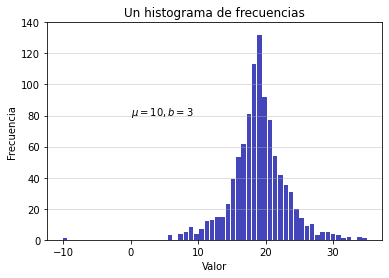

In [56]:
n, bins, patches = plt.hist(x = x, bins = "auto", color = "#0505a5", 
                            alpha=0.75, rwidth = 0.85)
plt.grid(axis = "y", alpha = 0.5)
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.title("Un histograma de frecuencias")
plt.text(0, 80, r'$\mu = 10, b = 3$')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq/10)*10 if maxfreq%10 else maxfreq + 10)

In [53]:
n

array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,   0.,
         4.,   5.,   8.,   4.,   7.,  12.,  13.,  15.,  15.,  23.,  39.,
        53.,  62.,  81., 113., 132.,  92.,  77.,  54.,  42.,  35.,  31.,
        20.,  14.,   9.,  10.,   3.,   5.,   5.,   4.,   3.,   1.,   2.,
         0.,   2.,   1.])

In [57]:
# Obtener los extremos
bins

array([-1.017e+01, -9.387e+00, -8.606e+00, -7.826e+00, -7.046e+00,
       -6.266e+00, -5.486e+00, -4.706e+00, -3.926e+00, -3.146e+00,
       -2.366e+00, -1.586e+00, -8.058e-01, -2.568e-02,  7.544e-01,
        1.534e+00,  2.315e+00,  3.095e+00,  3.875e+00,  4.655e+00,
        5.435e+00,  6.215e+00,  6.995e+00,  7.775e+00,  8.555e+00,
        9.335e+00,  1.012e+01,  1.090e+01,  1.168e+01,  1.246e+01,
        1.324e+01,  1.402e+01,  1.480e+01,  1.558e+01,  1.636e+01,
        1.714e+01,  1.792e+01,  1.870e+01,  1.948e+01,  2.026e+01,
        2.104e+01,  2.182e+01,  2.260e+01,  2.338e+01,  2.416e+01,
        2.494e+01,  2.572e+01,  2.650e+01,  2.728e+01,  2.806e+01,
        2.884e+01,  2.962e+01,  3.040e+01,  3.118e+01,  3.196e+01,
        3.274e+01,  3.352e+01,  3.430e+01,  3.508e+01])

In [58]:
# Obtener el numero de divisiones
patches

<BarContainer object of 58 artists>

In [60]:
import pandas as pd

In [61]:
size, scale = 1000, 10

In [62]:
data = pd.Series(np.random.gamma(scale, size = size))

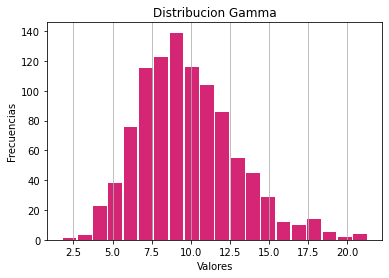

In [65]:
data.plot.hist(grid = True, bins = 20, rwidth = 0.9, color = "#d52675")
plt.title("Distribucion Gamma")
plt.xlabel("Valores")
plt.ylabel("Frecuencias")
plt.grid(axis = "y", alpha=0.75)

## Funciones de densidad y probabilidad

In [66]:
mu = 10, 20
sigma = 5, 2
dist = pd.DataFrame(np.random.normal(loc = mu, scale = sigma, size = (1000, 2)),
                    columns=['x1', 'x2'])

In [68]:
dist.agg(['min', 'max', 'mean', 'std']).round(decimals = 2)

,x1,x2
min,-5.83,13.84
max,26.05,27.17
mean,9.96,19.89
std,4.97,1.96


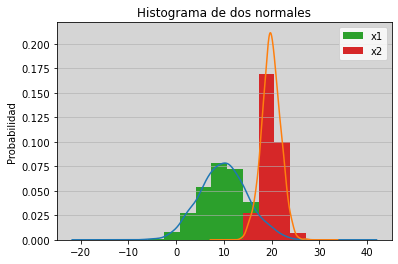

In [73]:
fig, ax = plt.subplots()
dist.plot.kde(ax=ax, legend=False, title="Histograma de dos normales")
dist.plot.hist(density=True, ax = ax)
ax.set_ylabel("Probabilidad")
ax.grid(axis="y", alpha=0.75)
ax.set_facecolor("#d5d5d5")

In [74]:
from scipy import stats

In [75]:
dist = stats.norm() # Distribucion normal teorica N(0,1) - exp(-x**2/2)/sqrt(2*pi)

In [80]:
sample = dist.rvs(size = 1000)

In [82]:
x = np.linspace(start = stats.norm.ppf(0.01), stop = stats.norm.ppf(0.99),
                 num = 250)

In [83]:
gkde = stats.gaussian_kde(dataset=sample)

Text(-2, 0.35, '$f(x) = \\frac{e^{-x^2/2}}{\\sqrt{2/pi}}$')

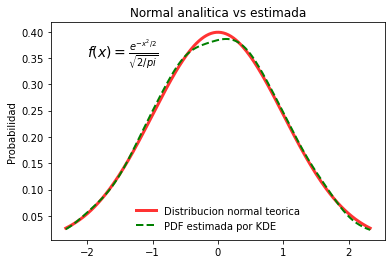

In [84]:
fig, ax = plt.subplots()
ax.plot(x, dist.pdf(x), linestyle = "solid", c="red", lw=3, alpha=0.8, 
       label = "Distribucion normal teorica")
ax.plot(x, gkde.evaluate(x), linestyle = "dashed", c="green", lw=2, 
       label = "PDF estimada por KDE")
ax.legend(loc = "best", frameon=False)
ax.set_title("Normal analitica vs estimada")
ax.set_ylabel("Probabilidad")
ax.text(-2, 0.35, r'$f(x) = \frac{e^{-x^2/2}}{\sqrt{2/pi}}$', fontsize=14)

## Histogramas con Seaborn

In [85]:
import seaborn as sb

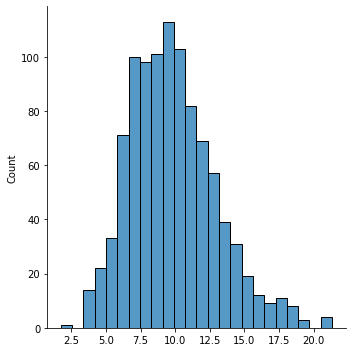

In [88]:
sb.displot(data)
plt.show()

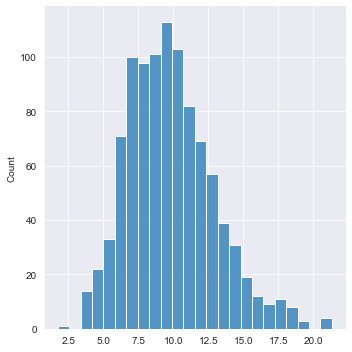

In [93]:
sb.set_style("darkgrid")
sb.displot(data)
plt.show()

C:\Users\adria\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

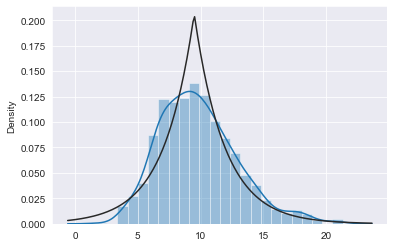

In [96]:
sb.distplot(data, fit=stats.laplace)

C:\Users\adria\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


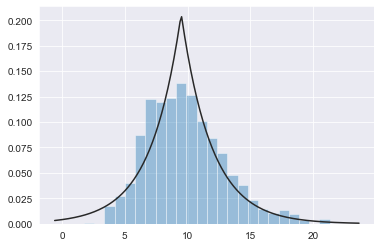

In [98]:
sb.distplot(data, fit=stats.laplace, kde=False)
plt.show()

## Otras formas

In [100]:
data2 = np.random.choice(np.arange(10), size=10000, p = np.linspace(1,11,10)/60)

In [101]:
s = pd.Series(data2)

In [102]:
s.value_counts()

9    1826
8    1650
7    1524
6    1288
5    1103
4     874
3     697
2     524
1     359
0     155
dtype: int64

In [103]:
s.value_counts(normalize=True)

9    0.1826
8    0.1650
7    0.1524
6    0.1288
5    0.1103
4    0.0874
3    0.0697
2    0.0524
1    0.0359
0    0.0155
dtype: float64

In [104]:
ages = pd.Series([1,1,3,5,6,8,9,10,12,15,18,18,18,20,25,30,40,51,52])

In [106]:
# Divisiones
bins = (0,10,15,18,21,np.inf)
labels = ('infancia', 'preadolescencia', 'adolescencia', 'universitario', 'adulto')
groups = pd.cut(ages, bins = bins, labels = labels)

In [107]:
groups

0            infancia
1            infancia
2            infancia
3            infancia
4            infancia
5            infancia
6            infancia
7            infancia
8     preadolescencia
9     preadolescencia
10       adolescencia
11       adolescencia
12       adolescencia
13      universitario
14             adulto
15             adulto
16             adulto
17             adulto
18             adulto
dtype: category
Categories (5, object): ['infancia' < 'preadolescencia' < 'adolescencia' < 'universitario' < 'adulto']

In [108]:
groups.value_counts()

infancia           8
adulto             5
adolescencia       3
preadolescencia    2
universitario      1
dtype: int64

In [109]:
pd.concat((ages, groups), axis=1).rename(columns={0:'age', 1:'group'})

,age,group
0,1,infancia
1,1,infancia
2,3,infancia
3,5,infancia
4,6,infancia
5,8,infancia
6,9,infancia
7,10,infancia
8,12,preadolescencia
9,15,preadolescencia
